In [1]:
import librosa
import os
import numpy as np
import sklearn 
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import librosa.display

In [3]:
Path = 'D:/Speech Data/Audio_Speech_Actors_01-24/'

In [4]:
label1 = os.listdir(Path)

In [5]:
X = np.zeros([20,100])
max_pad_len = 100

In [6]:
for label2 in label1:
    label3 = os.listdir(Path + label2)
    for label4 in label3:
        wave, sr = librosa.load(Path + label2 + '/' + label4 ,mono = True,sr = None,offset = 1.0,duration = 3.0)
        waves = wave[::3]
        mfcc = librosa.feature.mfcc(waves, sr=16000)
        mfccs = sklearn.preprocessing.scale(mfcc, axis=1)
        pad_width = max_pad_len - mfcc.shape[1]
        mfccs = np.pad(mfccs,((0,0),(0,pad_width)),'constant')
        X = np.vstack([X,mfccs])

In [8]:
FinalX = X[20:]
np.savetxt('FinalX',FinalX)

In [2]:
y = np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3])

In [3]:
a = y
for i in range(1,24):
    y = np.append(y,a)

In [4]:
y.shape

(1440,)

In [5]:
np.savetxt('FinalY1',y)

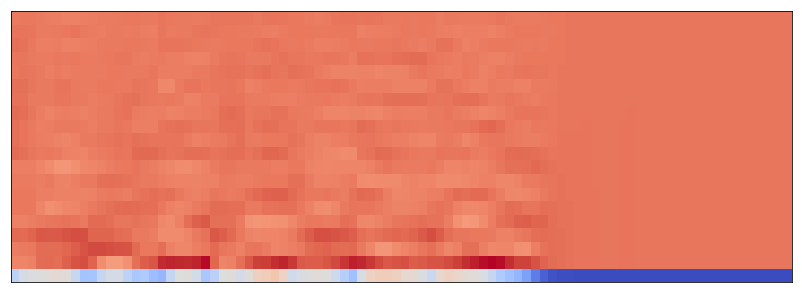

In [15]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfcc,sr=sr)

In [16]:
mfcc.shape

(20, 90)